###Fine Tuning:
In fine tuning learning we change the classification layer of our neural network.

One more thing is when are using fine tuning we need more data for feature extraction.


In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
# Helping function

# Plot the validation and training data separately
def plot_loss(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [3]:
import zipfile
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-11 17:13:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  57.7MB/s    in 2.8s    

2022-07-11 17:13:39 (57.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent

Create an ImageGenerator

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

In [6]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [7]:
print('Training Images')
train_data = datagen.flow_from_directory(
    directory = train_dir,
    target_size=(224,224),
    color_mode ='rgb',
    class_mode = 'categorical',
    batch_size=32
)


print('Test Images')
test_data =datagen.flow_from_directory(
    directory = test_dir,
    target_size=(224,224),
    color_mode ='rgb',
    class_mode = 'categorical',
    batch_size=32
)


Training Images
Found 750 images belonging to 10 classes.
Test Images
Found 2500 images belonging to 10 classes.


In [11]:
train_images, train_labels = next(train_data)

In [12]:
train_labels

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 

## Model 1

We use Mobile Net to build model

In [14]:
from tensorflow.keras.applications import MobileNet

In [22]:
base_model = MobileNet(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model_1 = tf.keras.Model(inputs,outputs)

#Compile Model 
model_1.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [24]:
# Model Summary

model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 global_average_pooling2d_4   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,239,114
Trainable params: 10,250
Non-trainable params: 3,228,864
_________________________________________________________________


You can check the model layers thorugh loop over the model

In [25]:
for layer_num, layer_name in enumerate(model_1.layers):
  print(layer_num, layer_name)

0 <keras.engine.input_layer.InputLayer object at 0x7f15757171d0>
1 <keras.engine.functional.Functional object at 0x7f15756b64d0>
2 <keras.layers.pooling.GlobalAveragePooling2D object at 0x7f1575882090>
3 <keras.layers.core.dense.Dense object at 0x7f15756d0810>


In [23]:
hist_1 = model_1.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
24/24 [==============================] - 56s 2s/step - loss: 2.5337 - accuracy: 0.1200 - val_loss: 2.3139 - val_accuracy: 0.1468
Epoch 2/10
24/24 [==============================] - 44s 2s/step - loss: 2.2064 - accuracy: 0.2040 - val_loss: 2.2206 - val_accuracy: 0.1876
Epoch 3/10
24/24 [==============================] - 44s 2s/step - loss: 2.0902 - accuracy: 0.2520 - val_loss: 2.1297 - val_accuracy: 0.2280
Epoch 4/10
24/24 [==============================] - 42s 2s/step - loss: 2.0027 - accuracy: 0.2840 - val_loss: 2.0778 - val_accuracy: 0.2368
Epoch 5/10
24/24 [==============================] - 41s 2s/step - loss: 1.9083 - accuracy: 0.3213 - val_loss: 2.0148 - val_accuracy: 0.2736
Epoch 6/10
24/24 [==============================] - 41s 2s/step - loss: 1.8396 - accuracy: 0.3760 - val_loss: 2.0077 - val_accuracy: 0.2752
Epoch 7/10
24/24 [==============================] - 41s 2s/step - loss: 1.7686 - accuracy: 0.3960 - val_loss: 2.0041 - val_accuracy: 0.2720
Epoch 8/10
24/24 [==

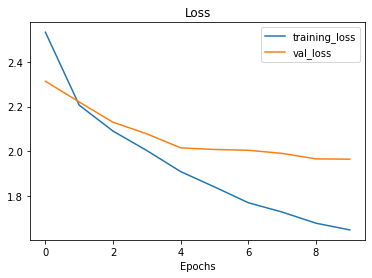

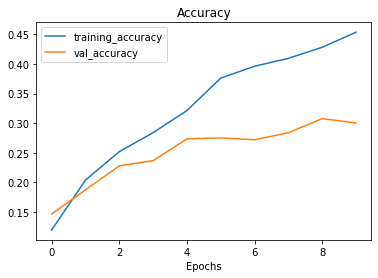

In [31]:
plot_loss(hist_1)

We can do more iteration to to improve model performance or normalize the data.

In [36]:
train_images ,train_labels = next(train_data)
test_images, test_labels = next(test_data)

In [37]:
train_images_norm = train_images/255
test_images_norm = test_images/255

In [42]:
base_model = MobileNet(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model_1 = tf.keras.Model(inputs,outputs)

#Compile Model 
model_1.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['accuracy'])

hist_2 = model_1.fit(train_images_norm,train_labels, epochs=10, validation_data=(test_images_norm,test_labels))

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 3.2696 - accuracy: 0.0625 - val_loss: 3.0056 - val_accuracy: 0.0625
Epoch 2/10
1/1 [==============================] - 0s 144ms/step - loss: 2.7725 - accuracy: 0.0312 - val_loss: 2.8528 - val_accuracy: 0.0625
Epoch 3/10
1/1 [==============================] - 0s 180ms/step - loss: 2.4028 - accuracy: 0.1250 - val_loss: 2.8433 - val_accuracy: 0.0938
Epoch 4/10
1/1 [==============================] - 0s 153ms/step - loss: 2.1615 - accuracy: 0.1562 - val_loss: 2.9078 - val_accuracy: 0.0625
Epoch 5/10
1/1 [==============================] - 0s 150ms/step - loss: 1.9958 - accuracy: 0.2500 - val_loss: 2.9703 - val_accuracy: 0.0625
Epoch 6/10
1/1 [==============================] - 0s 179ms/step - loss: 1.8482 - accuracy: 0.3750 - val_loss: 2.9906 - val_accuracy: 0.0625
Epoch 7/10
1/1 [==============================] - 0s 150ms/step - loss: 1.6894 - accuracy: 0.4062 - val_loss: 2.9616 - val_accuracy: 0.0625
Epoch 8/10
1/1 [=======

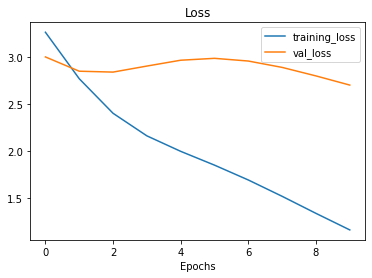

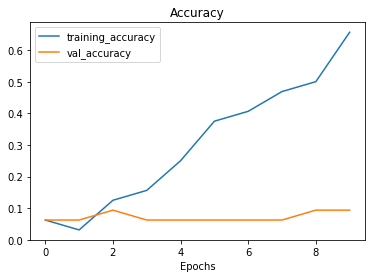

In [43]:
plot_loss(hist_2)

Model is not performing well lets try tune the layers and make them trainable means the weights will update after each iteration.

### Model 2

In [44]:
base_model = MobileNet(include_top=False)

base_model.trainable = True

inputs = tf.keras.layers.Input(shape=(224,224,3))

x = base_model(inputs)

# Add pooling layer or flatten layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)


# Add final dense layer
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model_2 = tf.keras.Model(inputs,outputs)

#Compile Model 
model_2.compile(optimizer=tf.optimizers.Adam(lr=0.001),loss=tf.losses.CategoricalCrossentropy(),metrics=['accuracy'])

hist_3 = model_2.fit(train_images_norm,train_labels, epochs=10, validation_data=(test_images_norm,test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 5s 5s/step - loss: 2.9106 - accuracy: 0.0938 - val_loss: 2.7070 - val_accuracy: 0.1875
Epoch 2/10
1/1 [==============================] - 0s 275ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.5871 - val_accuracy: 0.1562
Epoch 3/10
1/1 [==============================] - 0s 273ms/step - loss: 5.2436e-04 - accuracy: 1.0000 - val_loss: 4.3508 - val_accuracy: 0.2188
Epoch 4/10
1/1 [==============================] - 0s 274ms/step - loss: 3.8176e-04 - accuracy: 1.0000 - val_loss: 4.9015 - val_accuracy: 0.2188
Epoch 5/10
1/1 [==============================] - 0s 367ms/step - loss: 4.5218e-04 - accuracy: 1.0000 - val_loss: 5.2956 - val_accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 0s 289ms/step - loss: 6.1148e-04 - accuracy: 1.0000 - val_loss: 5.5595 - val_accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 246ms/step - loss: 7.2145e-04 - accuracy: 1.0000 - val_loss: 5.7286 - val_accuracy: 0.2500
Epoch 8/10
1/1

Again another problem data got overfit on training set.

What should we do now lets use another model from keras.

## Here we are going to use VGG19 model and imagenet weights

In [47]:
base_model = tf.keras.applications.VGG19(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

In [48]:
# Freeze the base model to check the performance

base_model.trainable = False

In [50]:
inputs = tf.keras.layers.Input(shape=(224,224,3))

x =base_model(inputs)

# Add pooling layer or flatten layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(x)

model_3 = tf.keras.Model(inputs, outputs)

In [51]:
model_3.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
hist_3 = model_3.fit(train_data, epochs=20, validation_data=(test_data))

Epoch 1/20
24/24 [==============================] - 55s 2s/step - loss: 6.9744 - accuracy: 0.1507 - val_loss: 5.3234 - val_accuracy: 0.1912
Epoch 2/20
24/24 [==============================] - 49s 2s/step - loss: 4.6612 - accuracy: 0.2200 - val_loss: 3.9705 - val_accuracy: 0.2724
Epoch 3/20
24/24 [==============================] - 48s 2s/step - loss: 3.3991 - accuracy: 0.3440 - val_loss: 3.2953 - val_accuracy: 0.3336
Epoch 4/20
24/24 [==============================] - 48s 2s/step - loss: 2.8404 - accuracy: 0.3907 - val_loss: 2.9361 - val_accuracy: 0.3904
Epoch 5/20
24/24 [==============================] - 48s 2s/step - loss: 2.2840 - accuracy: 0.4693 - val_loss: 2.5597 - val_accuracy: 0.4292
Epoch 6/20
24/24 [==============================] - 48s 2s/step - loss: 1.9838 - accuracy: 0.5040 - val_loss: 2.4183 - val_accuracy: 0.4616
Epoch 7/20
24/24 [==============================] - 48s 2s/step - loss: 1.8303 - accuracy: 0.5360 - val_loss: 2.2507 - val_accuracy: 0.4860
Epoch 8/20
24/24 [==

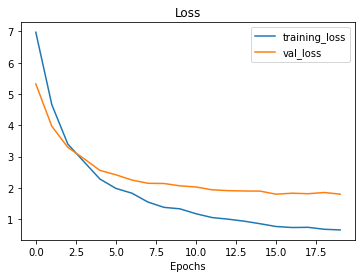

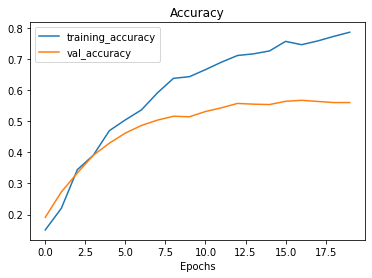

In [53]:
plot_loss(hist_3)

In [16]:

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB2(include_top=False)
base_model.trainable = True

# Create input and output layers
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer") # create input layer

x = base_model(inputs) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_4 = tf.keras.Model(inputs, outputs)

# Compile
model_4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
hist_4 = model_4.fit(train_data, epochs=20, validation_data=(test_data))

Epoch 1/20
24/24 [==============================] - 66s 2s/step - loss: 1.3749 - accuracy: 0.5213 - val_loss: 1.2429 - val_accuracy: 0.6540
Epoch 2/20
24/24 [==============================] - 48s 2s/step - loss: 0.3962 - accuracy: 0.8813 - val_loss: 2.2463 - val_accuracy: 0.5636
Epoch 3/20
24/24 [==============================] - 48s 2s/step - loss: 0.2223 - accuracy: 0.9307 - val_loss: 1.7514 - val_accuracy: 0.6076
Epoch 4/20
24/24 [==============================] - 48s 2s/step - loss: 0.1328 - accuracy: 0.9613 - val_loss: 1.4744 - val_accuracy: 0.6572
Epoch 5/20
24/24 [==============================] - 48s 2s/step - loss: 0.0937 - accuracy: 0.9693 - val_loss: 1.3417 - val_accuracy: 0.7136
Epoch 6/20
24/24 [==============================] - 48s 2s/step - loss: 0.1644 - accuracy: 0.9480 - val_loss: 1.4096 - val_accuracy: 0.6984
Epoch 7/20
24/24 [==============================] - 49s 2s/step - loss: 0.1990 - accuracy: 0.9293 - val_loss: 2.1085 - val_accuracy: 0.6124
Epoch 8/20
24/24 [==

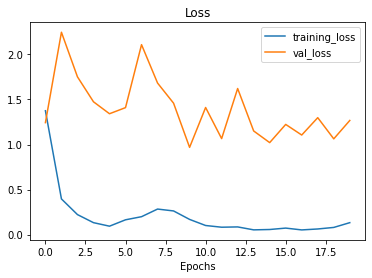

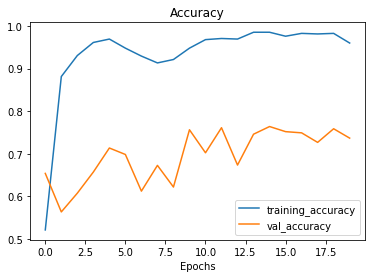

In [18]:
plot_loss(hist_4)